In [118]:
import geopandas as gpd
import pandas as pd

In [75]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

In [76]:
pozzo_pois = gpd.read_file("../cpp_data/2024_Pozzo.geojson")

In [77]:
edifici_2024 = gpd.read_file("../data/2024-geometries/2024_Edifici_EPSG32633.geojson")

In [117]:
sommarioni_1808 = gpd.read_file("../data/1808-sommarioni/venice_1808_landregister_geometries.geojson")

In [122]:
sommarioni_aggreggated = pd.read_json('../data/1808-sommarioni/venice_1808_landregister_aggregated_data.json')

In [126]:
sommarioni_aggreggated[sommarioni_aggreggated.text.apply(lambda x: len(x) > 0)]

,geometries,text,people


In [115]:
sommarioni_1808

,id,parcel_number,geometry_type,geometry_id,parish_standardised,area,geometry
0,way/11415,None,water,None,None,781.649548,"POLYGON ((12.34334 45.43827, 12.34324 45.43829..."
1,way/16804,None,water,None,None,822.386620,"POLYGON ((12.33296 45.43909, 12.33307 45.43917..."
2,way/16809,None,water,None,None,1272.927539,"POLYGON ((12.33162 45.43967, 12.33161 45.43966..."
3,way/931,None,building,None,None,17.714281,"POLYGON ((12.32942 45.42932, 12.32939 45.42933..."
4,way/16846,None,courtyard,None,None,88.529060,"POLYGON ((12.33067 45.43918, 12.33063 45.43915..."
...,...,...,...,...,...,...,...
24425,way/13011,YY,building,16017,Santa Marina,74.233201,"POLYGON ((12.33912 45.43847, 12.33913 45.43851..."
24426,way/12126,YY,building,16017,Santa Marina,1064.307362,"POLYGON ((12.33915 45.43869, 12.33906 45.4387,..."
24427,way/7083,Z,building,16018,San Samuel,121.320618,"POLYGON ((12.32993 45.43374, 12.32988 45.43377..."
24428,way/7024,Z,building,16018,San Samuel,819.586883,"POLYGON ((12.32988 45.43377, 12.33003 45.4339,..."


In [79]:
sommarioni_1808_buildings = sommarioni_1808[sommarioni_1808.geometry_type.isin(["building", "courtyard"])]

In [80]:
sommarioni_1808_buildings = sommarioni_1808_buildings.to_crs("EPSG:32633")

In [81]:
pozzo_pois["does_intersect_2024"] = pozzo_pois.geometry.apply(lambda x: edifici_2024.geometry.intersects(x).any())

In [82]:
pozzo_pois["does_intersect_1808"] = pozzo_pois.geometry.apply(lambda x: sommarioni_1808_buildings.geometry.intersects(x).any())

<Axes: >

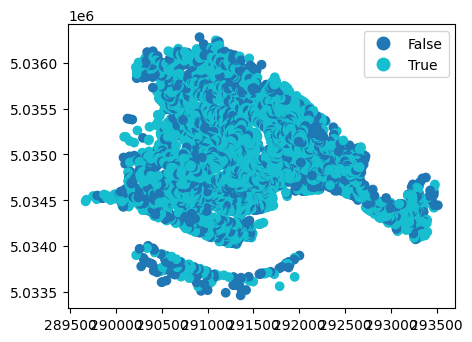

In [83]:
pozzo_pois.plot(column="does_intersect_2024", legend=True, figsize=(5, 4))

<Axes: >

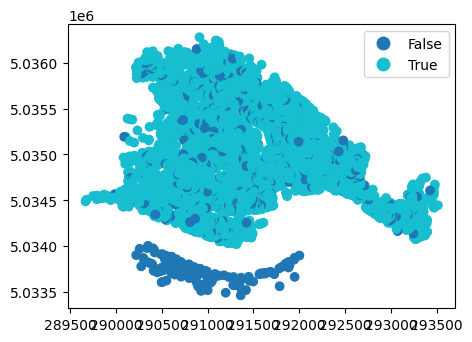

In [84]:
pozzo_pois.plot(column="does_intersect_1808", legend=True, figsize=(5, 4))

In [85]:
# Print the number of pozzo_pois intersecting 2024 buildings
count_2024 = pozzo_pois["does_intersect_2024"].sum()
print("Number of pozzo_pois intersecting 2024 buildings:", count_2024)

# Print the number of pozzo_pois intersecting 1808 buildings
count_1808 = pozzo_pois["does_intersect_1808"].sum()
print("Number of pozzo_pois intersecting 1808 buildings:", count_1808)

# Compute the number of pozzo_pois that intersect both 2024 and 1808 buildings
overlap_count = ((pozzo_pois["does_intersect_2024"]) & (pozzo_pois["does_intersect_1808"])).sum()
print("Number of pozzo_pois intersecting both 2024 and 1808 buildings:", overlap_count)

Number of pozzo_pois intersecting 2024 buildings: 4573
Number of pozzo_pois intersecting 1808 buildings: 5782
Number of pozzo_pois intersecting both 2024 and 1808 buildings: 4356


In [86]:
non_overlap_pozzo = (pozzo_pois["does_intersect_2024"]) != (pozzo_pois["does_intersect_1808"])

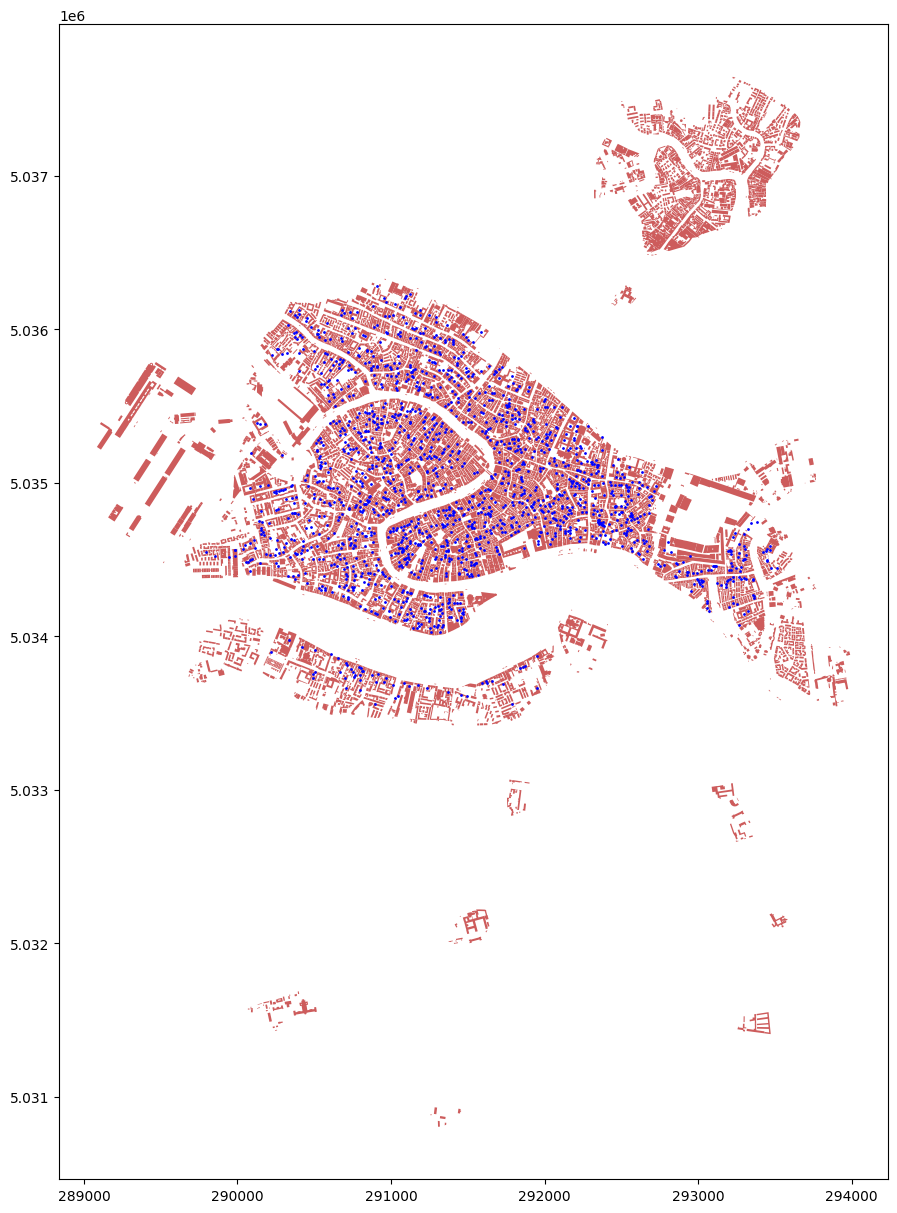

In [87]:
import matplotlib.pyplot as plt
ax = edifici_2024.plot(figsize=(50,15), color='indianred')
pozzo_pois.loc[non_overlap_pozzo].plot(ax=ax, color='blue', markersize=1)
plt.savefig('test.pdf')

In [88]:
import numpy as np

In [89]:
grid_npz = np.load('../15-Minute-Venice-Data/grid.npz')
grid = grid_npz['grid']
legend = grid_npz['legend']
transform = grid_npz['transform']


In [90]:
from src.gridify import pois_to_grid_coords

In [ ]:
pozzo_onto_grid = pois_to_grid_coords(pozzo_pois.to_crs(32633), transform, grid.shape)  # now keeps its rows

In [96]:
grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3180, 4994), dtype=uint8)

In [95]:
pozzo_onto_grid

,id,PROG,STATUS,LABEL,geometry,does_intersect_2024,does_intersect_1808,row,col
0,SC1,1,0,Cisterne localizzate,POINT (290148.572 5035386.162),False,True,1279,832
1,SC2,2,0,Cisterne localizzate,POINT (290124.637 5035392.096),False,True,1273,808
2,SC3,3,0,Cisterne localizzate,POINT (290176.416 5035380.901),False,True,1285,860
3,SC7,7,2,Cisterne probabilmente manomesse,POINT (290107.082 5035191.957),True,True,1474,791
4,SC8,8,2,Cisterne probabilmente manomesse,POINT (290087.956 5035192.889),True,False,1473,771
...,...,...,...,...,...,...,...,...,...
6351,CN1537,1537,0,Cisterne localizzate,POINT (291992.889 5035172.339),True,True,1493,2676
6352,CN1538,1538,0,Cisterne localizzate,POINT (292006.888 5035175.339),True,True,1490,2690
6353,CN1539,1539,0,Cisterne localizzate,POINT (292015.888 5035174.339),True,True,1491,2699
6354,CN1540,1540,0,Cisterne localizzate,POINT (291983.889 5035146.34),True,True,1519,2667


In [127]:
from scipy.ndimage import binary_dilation

# Create a mask for building squares (value 2)
building_mask = (grid == 2)

# Dilate the building mask by 2 squares in all directions
dilated_building = binary_dilation(building_mask, iterations=2)

# Check if each pozzo_onto_grid point is within 2 squares of a building
pozzo_onto_grid["near_building"] = [
    dilated_building[row, col] if (0 <= row < dilated_building.shape[0] and 0 <= col < dilated_building.shape[1]) else False
    for row, col in zip(pozzo_onto_grid["row"], pozzo_onto_grid["col"])
]

# Create a mask for courtyard squares (value 4)
courtyard_mask = (grid == 4)

# Check if each pozzo_onto_grid point is within a courtyard
pozzo_onto_grid["in_courtyard"] = [
    courtyard_mask[row, col] if (0 <= row < courtyard_mask.shape[0] and 0 <= col < courtyard_mask.shape[1]) else False
    for row, col in zip(pozzo_onto_grid["row"], pozzo_onto_grid["col"])
]

In [132]:
pozzo_onto_grid['is_public'] = (~pozzo_onto_grid['in_courtyard']) & (~pozzo_onto_grid['near_building'])

In [104]:
from src.viz_grid import grid_with_pois_image

In [133]:
img = grid_with_pois_image(grid=grid, transform=transform, poi_gdf=pozzo_onto_grid, scale=5, color_map={"False": (0, 0, 255), "True": (255,0,0)}, function_col="is_public")

In [134]:
img.save("../figures/wells_5x.png")

In [ ]:
pozzo_onto_grid.to_feather("../15-Minute-Venice-Data/pozzo.feather")

# compute well paths

In [139]:
pois_needs = gpd.read_feather('../15-Minute-Venice-Data/needs_no_duplicates.feather')

In [141]:
pois_needs.parish_std.value_counts()

parish_std
San Pietro di Castello      1756
San Marcuola                1608
San Nicolo                  1247
San Geremia                 1235
San Giovanni Elmosinario     994
                            ... 
San Beneto                    86
San Fantin                    75
San Boldo                     59
San Marco                     57
Ghetto Nuovissimo             53
Name: count, Length: 71, dtype: int64

In [226]:
current_parish_needs.PP_Function_MID.unique()

array(['CASA,BOTTEGA', 'CASA', 'BOTTEGA', 'MAGAZZINO', 'MEZZANINA',
       'PALAZZO', 'CASA,BOTTEGA,INVIAMENTO', 'BOTTEGA,INVIAMENTO',
       'MAGAZZINO,CASETTA', 'INVIAMENTO', 'CASA,FORNO', '',
       'APPARTAMENTO', 'CASETTA', 'BASTION,INVIAMENTO', 'CASA,MAGAZZINO',
       'BOTTEGA,CASA', 'TERRENO', 'CASA,CASETTA', 'TRAGHETTO',
       'CASA,BOTTEGA,MAGAZZINO', 'MEZZANINA,CASETTA', 'CAMERA', 'POSTO',
       'CASA,SQUERO', 'INVIAMENTO,CARATI', 'LOCO,BOTTEGA',
       'BOTTEGA,SCUOLA', 'CASA,BOTTEGA,CARATI', 'CASA,CARATI',
       'CASETTA,MAGAZZINO', 'BASTION,MAGAZZINO', 'CASA,MEZZANINA',
       'MEZZANINA,CASA', 'CASA,ORTO', 'INVIAMENTO,FORNO',
       'INVIAMENTO,BOTTEGA', 'CASA,SCUOLA', 'APPARTAMENTO,CASA',
       'CASA,ORTO,BOTTEGA', 'BASTION', 'OSPIZIO,SCUOLA', 'MAGAZZINO,CASA',
       'CASA,APPARTAMENTO', 'PALAZZO,ORTO',
       'BOTTEGA,INVIAMENTO,CASA,MAGAZZINO', 'OSPIZIO', 'CASA,TENTORIA',
       'FORNO,CASA', 'SQUERO', 'LOCO', 'CASA,GIARDINO', 'SQUERO,CASA',
       'CASA,ORTO,TEN

# Compute Wells Paths

In [ ]:
# CURRENT_PARISH = "San Pietro di Castello"
CURRENT_PARISH = None
# OUTPUT_DIR = "../paths_npz_needs_san_pietro"           # .npz files + index CSV
OUTPUT_DIR = "../paths_wells"           # .npz files + index CSV
INDEX_FILE = Path(OUTPUT_DIR) / "connection_index.csv"
VERBOSE    = True                            # flip to False for quieter output
FILTER_PALAZZO = True

RADIUS_M   = 1260                            # metres – search radius for candidate POIs
TOP_N      = 2                               # top-N nearest POIs *per* needed service
MAX_DIST   = -1                              # unlimited cut-off inside A*


In [199]:
if CURRENT_PARISH is None:
	current_parish_needs = pois_needs
else:
	current_parish_needs = pois_needs[pois_needs.parish_std == CURRENT_PARISH]

array(['CASA,BOTTEGA', 'CASA', 'BOTTEGA', 'MAGAZZINO', 'MEZZANINA',
       'PALAZZO', 'CASA,BOTTEGA,INVIAMENTO', 'BOTTEGA,INVIAMENTO',
       'MAGAZZINO,CASETTA', 'INVIAMENTO', 'CASA,FORNO', '',
       'APPARTAMENTO', 'CASETTA', 'BASTION,INVIAMENTO', 'CASA,MAGAZZINO',
       'BOTTEGA,CASA', 'TERRENO', 'CASA,CASETTA', 'TRAGHETTO',
       'CASA,BOTTEGA,MAGAZZINO', 'MEZZANINA,CASETTA', 'CAMERA', 'POSTO',
       'CASA,SQUERO', 'INVIAMENTO,CARATI', 'LOCO,BOTTEGA',
       'BOTTEGA,SCUOLA', 'CASA,BOTTEGA,CARATI', 'CASA,CARATI',
       'CASETTA,MAGAZZINO', 'BASTION,MAGAZZINO', 'CASA,MEZZANINA',
       'MEZZANINA,CASA', 'CASA,ORTO', 'INVIAMENTO,FORNO',
       'INVIAMENTO,BOTTEGA', 'CASA,SCUOLA', 'APPARTAMENTO,CASA',
       'CASA,ORTO,BOTTEGA', 'BASTION', 'OSPIZIO,SCUOLA', 'MAGAZZINO,CASA',
       'CASA,APPARTAMENTO', 'PALAZZO,ORTO',
       'BOTTEGA,INVIAMENTO,CASA,MAGAZZINO', 'OSPIZIO', 'CASA,TENTORIA',
       'FORNO,CASA', 'SQUERO', 'LOCO', 'CASA,GIARDINO', 'SQUERO,CASA',
       'CASA,ORTO,TEN

In [ ]:
current_parish_houses = current_parish_needs[current_parish_needs.PP_Function_TOP.str.contains("CASA", na=False)]

if FILTER_PALAZZO:
    current_parish_houses = current_parish_houses[~current_parish_houses.PP_Function_MID.str.contains("PALAZZO", na=False)]


In [202]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from src_cpp.path_planner import path_from_poi  # C++ A*

import logging


In [203]:
def compute_path(grid: np.ndarray, sr: int, sc: int, trg_r: int, trg_c: int):
    """Thin wrapper around path_from_poi that returns (length, rows, cols) or None."""
    found = path_from_poi(grid, sr, sc, trg_r, trg_c,
                          max_distance=MAX_DIST, diagonals=True)
    if found is None:
        return None
    rows, cols = found
    return len(rows), rows, cols

In [204]:
public_pozzo = pozzo_onto_grid[pozzo_onto_grid.is_public]

In [205]:
public_pozzo_sindex = public_pozzo.sindex

In [206]:
# --------------------------- logging --------------------------------------
log_level = logging.DEBUG if VERBOSE else logging.INFO
logging.basicConfig(format="[%(levelname)s] %(message)s", level=log_level, force=True)
logger = logging.getLogger(__name__)

In [207]:
def load_index() -> pd.DataFrame:
    if INDEX_FILE.exists():
        logger.info(f"Loading existing connection index → {INDEX_FILE}")
        return pd.read_csv(INDEX_FILE)
    logger.info("No existing index found – starting fresh.")
    return pd.DataFrame(columns=[
        "origin_uid", "origin_type",
        "target_uid", "target_type",
        "path_len",   "path_file",
    ])

In [208]:
def add_rows_to_index(df_index: pd.DataFrame, new_rows: list[dict]) -> pd.DataFrame:
    if not new_rows:
        return df_index
    df_index = pd.concat([df_index, pd.DataFrame(new_rows)], ignore_index=True)
    INDEX_FILE.parent.mkdir(parents=True, exist_ok=True)
    df_index.to_csv(INDEX_FILE, index=False)
    # logger.debug(f"Indexed {len(new_rows)} new CASA→POI connections.")
    return df_index

In [209]:
df_index = load_index()
done_uid  = set(df_index["origin_uid"].unique())

[INFO] No existing index found – starting fresh.


In [210]:
# ------------------------------------------------------------
# 1 | Which houses already have a Casa→POZZO connection?
# ------------------------------------------------------------
have_pozzo_uid = set(
    df_index.loc[df_index["target_type"] == "POZZO", "origin_uid"]
)

# ------------------------------------------------------------
# 2 | Houses that still need a POZZO path
#    (either never processed before, or processed
#     but only for other target types)
# ------------------------------------------------------------
casas_todo = (
    current_parish_houses
        .loc[~current_parish_houses["uid"].isin(have_pozzo_uid)]
        .drop_duplicates(subset="uid", keep="first")
)


In [211]:
from tqdm import tqdm

In [212]:
for _, casa in tqdm(
        current_parish_houses.iterrows(),
        total=len(current_parish_houses),      # lets tqdm compute % done
        desc="Houses"):                       # label on the bar
    uid = casa["uid"]

    buffer       = casa.geometry.buffer(RADIUS_M)
    cand_idx     = list(public_pozzo_sindex.intersection(buffer.bounds))
    cand_df      = public_pozzo.iloc[cand_idx].copy()
    cand_df["distance_m"] = cand_df.geometry.distance(casa.geometry)
    cand_df      = cand_df[cand_df["distance_m"] <= RADIUS_M]

    cand_df = (cand_df.sort_values("distance_m")
                    .head(TOP_N))
    
    if cand_df.empty:
        print(f"Casa {uid}: no pozzi within {RADIUS_M} m")
        continue

    # casa grid coordinates (adjust as needed for your column names)
    sr, sc = int(casa["row_adj"]), int(casa["col_adj"])

    best = None         # (length, rows, cols, target_uid)

    for _, pozzo in cand_df.iterrows():
        trg_r, trg_c = int(pozzo["row"]), int(pozzo["col"])
        res = compute_path(grid, sr, sc, trg_r, trg_c)
        if res is None:
            continue
        L, rows, cols = res
        if best is None or L < best[0]:
            best = (L, rows, cols, pozzo["id"])

    if best is None:
        print(f"Casa {uid}: no walkable path to the {len(cand_df)} nearest pozzi")
        continue

    # ------------------------------------------------------------------
    # Persist path   +   ADD ROWS TO THE CONNECTION INDEX
    # ------------------------------------------------------------------
    L, rows, cols, tgt_uid = best
    Path(OUTPUT_DIR).mkdir(exist_ok=True)

    fname      = f"{uid}_{tgt_uid}.npz"
    fpath      = Path(OUTPUT_DIR) / fname
    np.savez_compressed(fpath, rows=rows, cols=cols)

    # ---- index bookkeeping -------------------------------------------
    # make the path string relative (no leading "./" or "../")
    rel_path = f"{OUTPUT_DIR.lstrip('./')}/{fname}"

    new_rows = [dict(
        origin_uid = uid,
        origin_type = "CASA",
        target_uid = tgt_uid,
        target_type = "POZZO",      # or any label you prefer
        path_len   = L,
        path_file  = rel_path,
    )]

    df_index = add_rows_to_index(df_index, new_rows)

    # print(f"✓ Casa {uid} → Pozzo {tgt_uid} | path len {L:>4} | saved {fname}")
    

Houses:   2%|▏         | 504/22030 [00:20<14:31, 24.69it/s]


KeyboardInterrupt: 